In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 161MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.1984 - accuracy: 0.6007 - val_loss: 0.5967 - val_accuracy: 0.6850
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5592 - accuracy: 0.7190 - val_loss: 1.0977 - val_accuracy: 0.6588
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4617 - accuracy: 0.7800 - val_loss: 0.4887 - val_accuracy: 0.7654
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4016 - accuracy: 0.8206 - val_loss: 0.5046 - val_accuracy: 0.7806
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3319 - accuracy: 0.8562 - val_loss: 0.5248 - val_accuracy: 0.7658
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2518 - accuracy: 0.8936 - val_loss: 0.5493 - val_accuracy: 0.7730
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1979 - accuracy: 0.9228 - val_loss: 0.5432 - val_ac

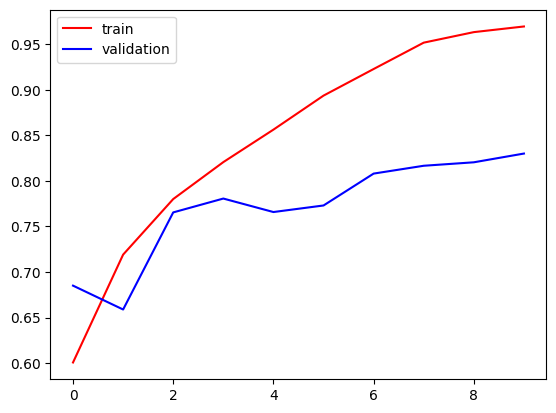

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

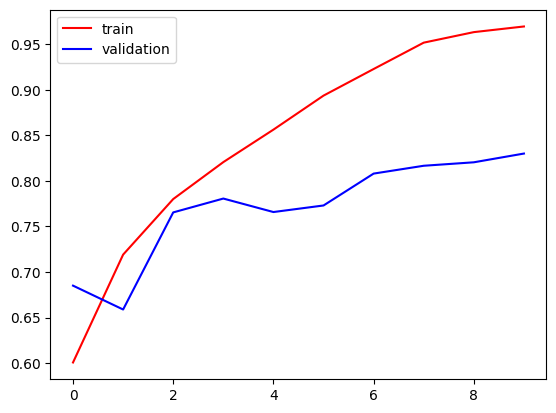

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

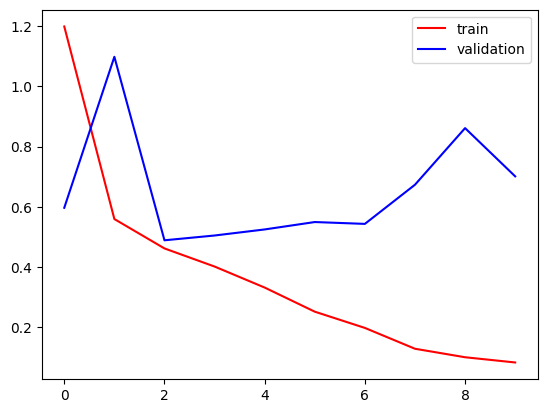

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/train/dogs/dog.0.jpg')

In [ ]:
print(type(test_img))

<class 'numpy.ndarray'>


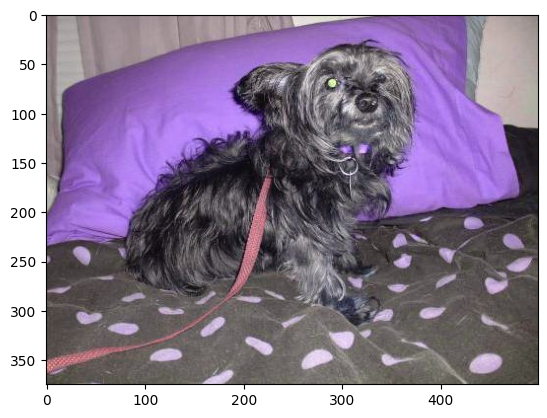

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(375, 499, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
output = model.predict(test_input)

1/1 [==============================] - 0s 420ms/step


In [ ]:
if output < 0.5:
  print('Cat')
else:
  print('Dog')

Dog


In [ ]:
test_img2 = cv2.imread('/content/train/cats/cat.1.jpg')

In [ ]:
print(type(test_img2))

<class 'numpy.ndarray'>


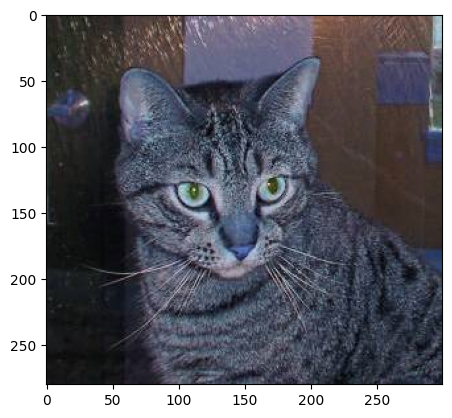

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(280, 300, 3)

In [ ]:
test_img2 = cv2.resize(test_img2, (256,256))

In [ ]:
test_input = test_img2.reshape((1,256,256,3))

In [ ]:
output = model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [ ]:
if output < 0.5:
  print('Cat')
else:
  print('Dog')

Cat
